IMPORT MODULES

In [1]:
# pip uninstall transformers peft -y

In [2]:
# pip install transformers==4.37.2

In [3]:
# pip install peft==0.3.0 

In [4]:
# pip uninstall -y transformers accelerate

In [5]:
# pip install accelerate==0.25.0

In [6]:
import transformers
import accelerate

print(transformers.__version__)  # Should print 4.37.2
print(accelerate.__version__)   # Should print 0.25.0

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

4.37.2
0.25.0


In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset , DataLoader
from transformers import Wav2Vec2Model , Wav2Vec2Processor, Wav2Vec2ForSequenceClassification, Trainer, TrainingArguments

import warnings
warnings.filterwarnings('ignore')

2025-04-13 11:01:16.523264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744542076.545308     169 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744542076.552401     169 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


LOAD THE DATASET

In [8]:
dataset_path = "/kaggle/input/emotion"  
paths = []
labels = []

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith(".wav"): 
            paths.append(os.path.join(dirname, filename))

            label = os.path.basename(dirname) 
            labels.append(label.lower())  
    if len(paths) == 2800:  
        break

print(f"Dataset Loaded! Found {len(paths)} audio files.")

Dataset Loaded! Found 1400 audio files.


In [9]:
len(paths)

1400

In [10]:
paths[:5]

['/kaggle/input/emotion/TESS Toronto emotional speech set data - Copy/OAF_angry/OAF_raid_angry.wav',
 '/kaggle/input/emotion/TESS Toronto emotional speech set data - Copy/OAF_angry/OAF_half_angry.wav',
 '/kaggle/input/emotion/TESS Toronto emotional speech set data - Copy/OAF_angry/OAF_bought_angry.wav',
 '/kaggle/input/emotion/TESS Toronto emotional speech set data - Copy/OAF_angry/OAF_rose_angry.wav',
 '/kaggle/input/emotion/TESS Toronto emotional speech set data - Copy/OAF_angry/OAF_numb_angry.wav']

In [11]:
labels[:5]

['oaf_angry', 'oaf_angry', 'oaf_angry', 'oaf_angry', 'oaf_angry']

In [12]:
## Create a dataframe

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry
1,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry
2,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry
3,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry
4,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry


In [13]:
print(df['label'].unique()) 

['oaf_angry' 'oaf_fear' 'oaf_disgust' 'oaf_neutral' 'oaf_sad'
 'oaf_pleasant_surprise' 'oaf_happy']


In [14]:
df['label'].value_counts()

label
oaf_angry                200
oaf_fear                 200
oaf_disgust              200
oaf_neutral              200
oaf_sad                  200
oaf_pleasant_surprise    200
oaf_happy                200
Name: count, dtype: int64

In [15]:
print(df.columns)

Index(['speech', 'label'], dtype='object')


EXPOLATORY DATA ANALYSIS

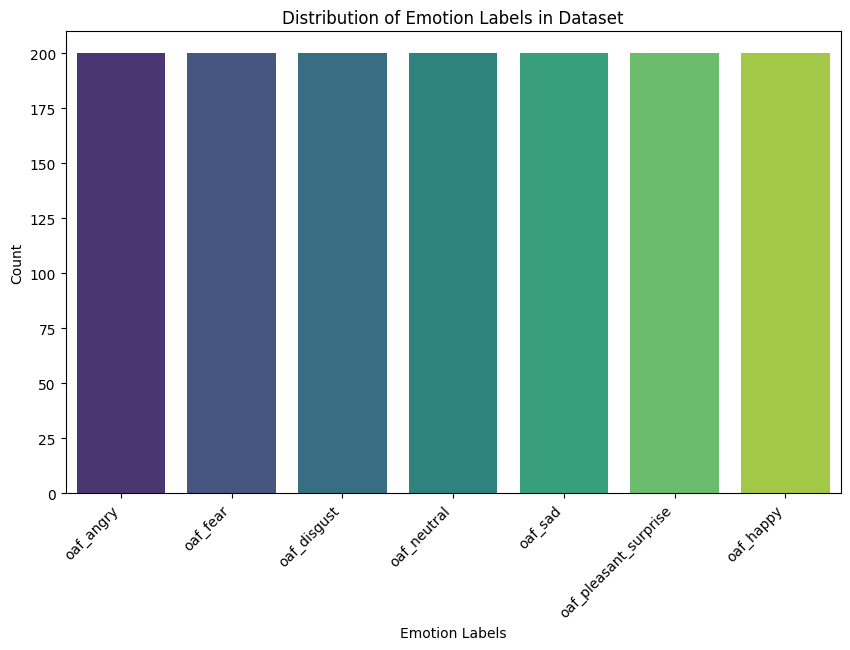

In [16]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='label', palette="viridis")  
plt.xticks(rotation=45, ha='right')
plt.xlabel("Emotion Labels")  
plt.ylabel("Count") 
plt.title("Distribution of Emotion Labels in Dataset")  
plt.show()

In [17]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

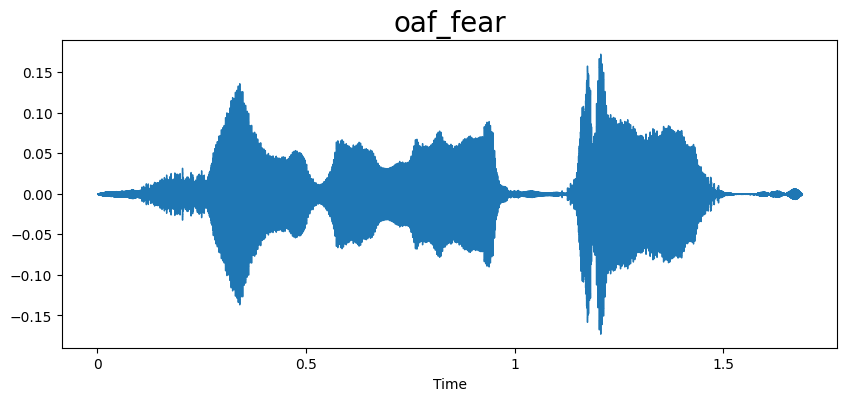

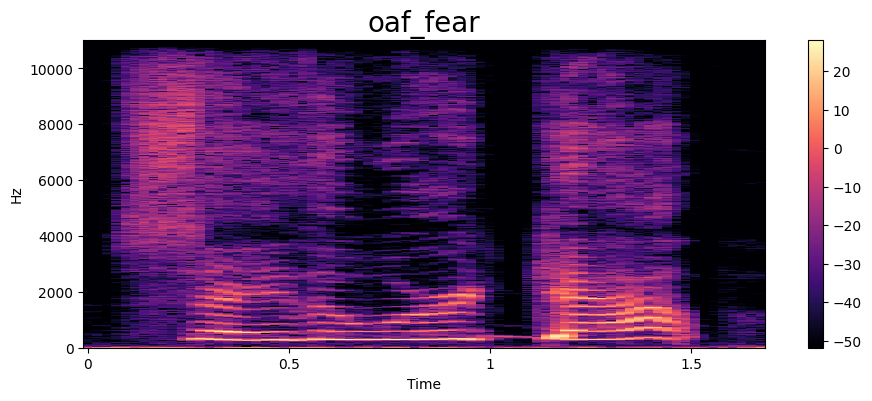

In [18]:
emotion = 'oaf_fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

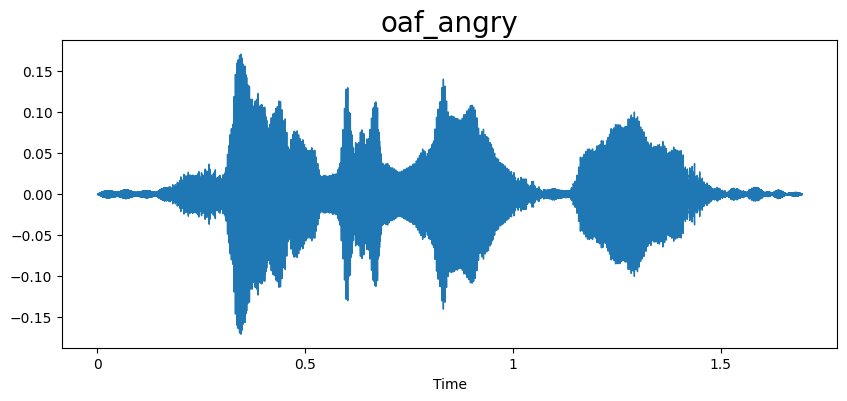

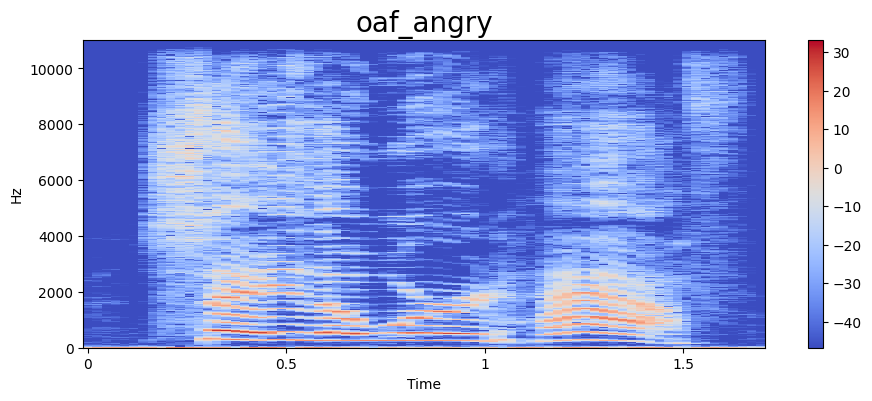

In [19]:
emotion = 'oaf_angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

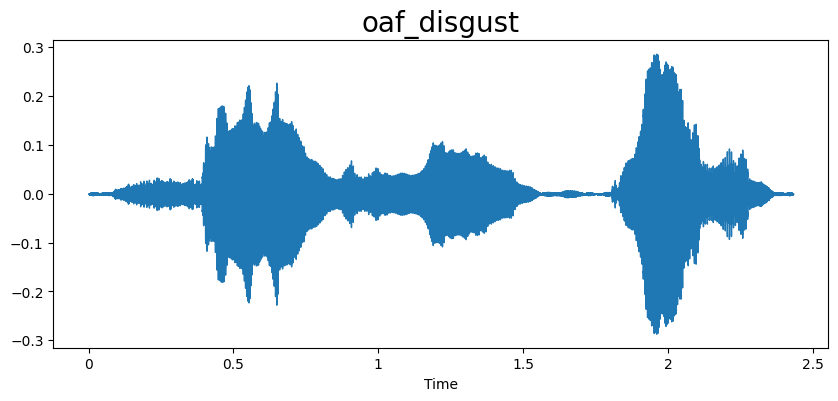

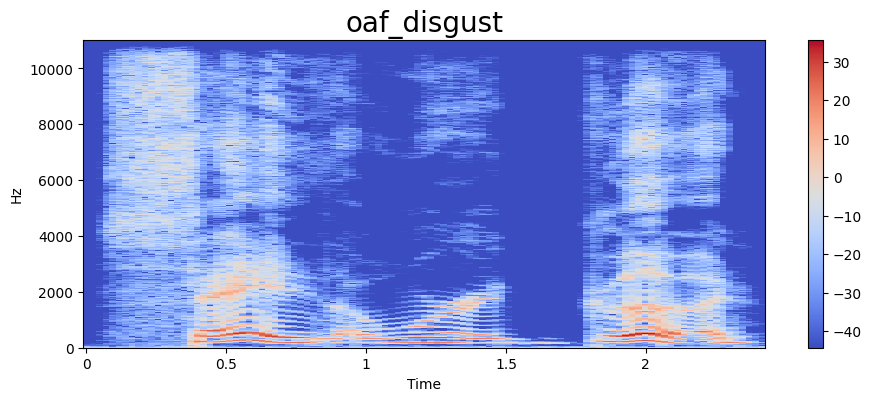

In [20]:
emotion = 'oaf_disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

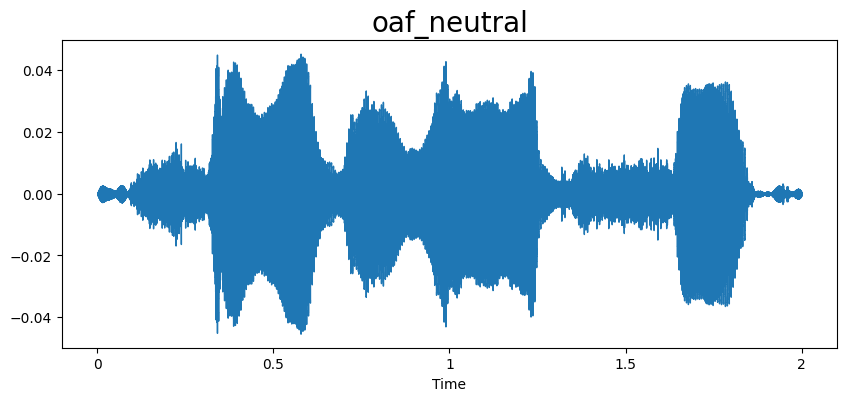

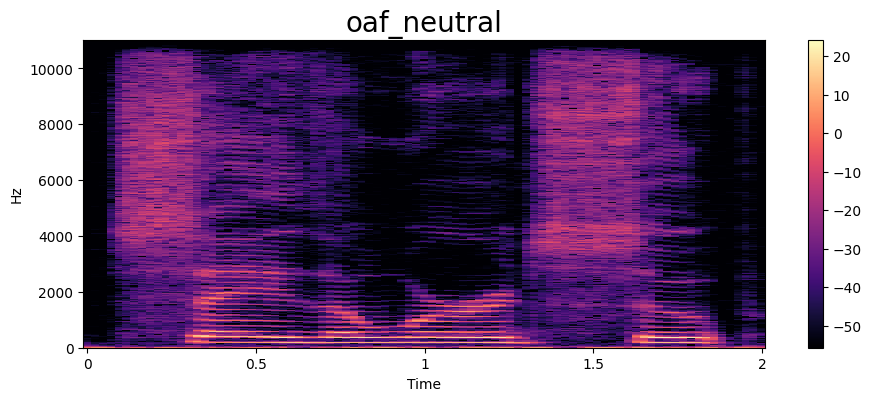

In [21]:
emotion = 'oaf_neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

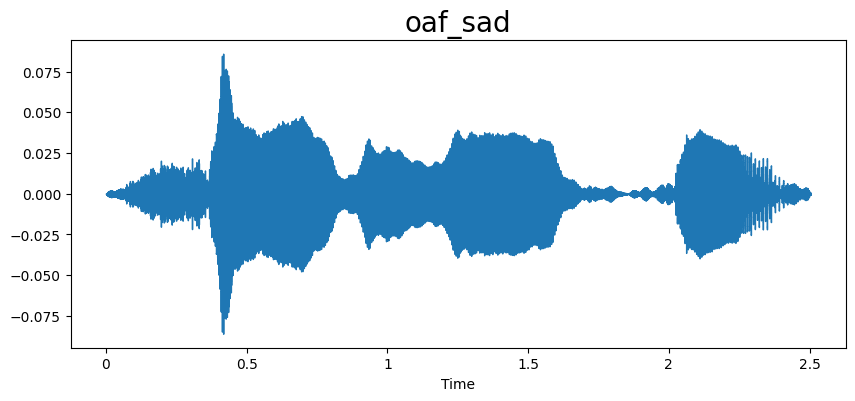

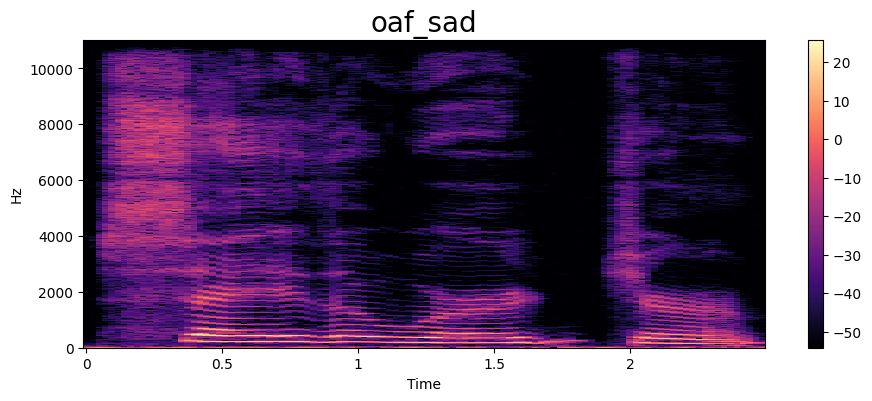

In [22]:
emotion = 'oaf_sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

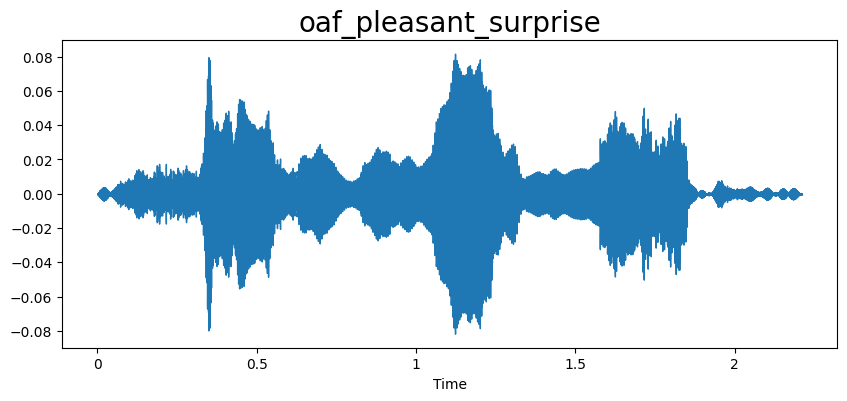

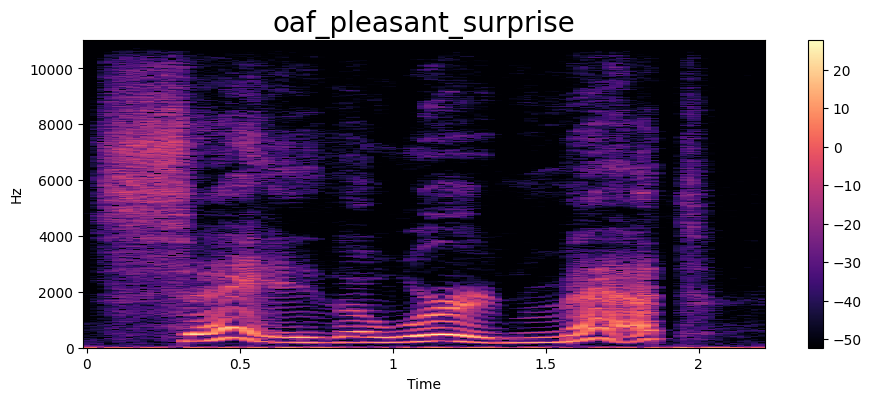

In [23]:
emotion = 'oaf_pleasant_surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

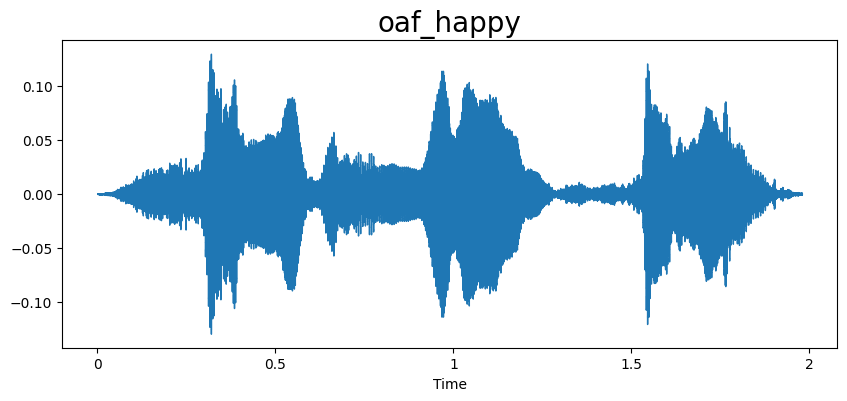

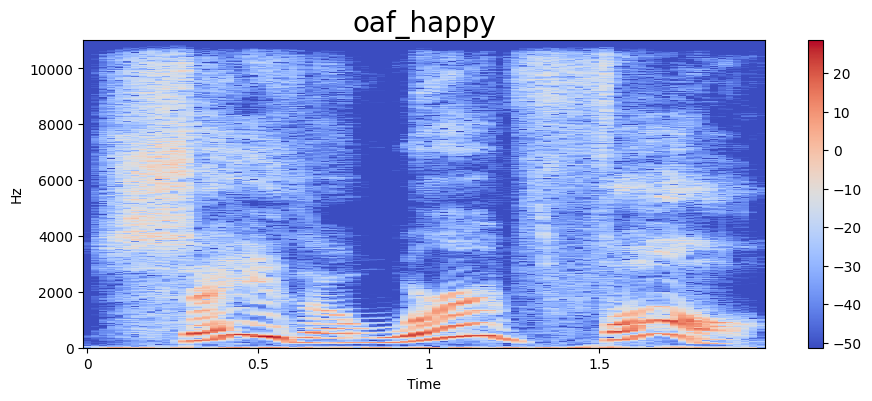

In [24]:
emotion = 'oaf_happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

CREATE CUSTOM DATASET CLASS

In [25]:
# Convert labels to integers

label_map = {label: idx for idx, label in enumerate(df['label'].unique())}
inverse_label_map = {idx: label for label, idx in label_map.items()}
df['labels'] = df['label'].map(label_map)
df.head(2)

,speech,label,labels
0,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry,0
1,/kaggle/input/emotion/TESS Toronto emotional s...,oaf_angry,0


In [26]:
emotion = 'oaf_pleasant_surprise'
path = np.array(df['speech'][df['labels'] == 2])[0]
data, sampling_rate = librosa.load(path)
len(data)
sampling_rate * 2

44100

In [27]:
#  Add Background Noise

def add_background_noise(speech, noise_level=0.005):
    noise = torch.randn_like(speech) * noise_level
    return speech + noise

# Compute Mel Spectrogram

def get_mel_spectrogram(speech, sr):
    S = librosa.feature.melspectrogram(y=speech, sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB

# Compute MFCC

def get_mfcc(speech, sr, n_mfcc=13):
    return librosa.feature.mfcc(y=speech, sr=sr, n_mfcc=n_mfcc)

# Normalize Audio

def normalize_audio(speech, target_length=16000):
    if len(speech) < target_length:
        padding = target_length - len(speech)
        speech = np.pad(speech, (0, padding))
    else:
        speech = speech[:target_length]
    return speech / np.max(np.abs(speech))  # normalize volume

In [28]:
class SpeechEmotionDataset(Dataset):
    def __init__(self, df, processor, label2id, max_length=32000):
        self.df = df
        self.processor = processor
        self.max_length = max_length
        self.label2id = label2id or {label: idx for idx, label in enumerate(df['label'].unique())}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        audio_path = self.df.iloc[idx]['speech']
        label = self.df.iloc[idx]['label']
        label_id = self.label2id[label]

        # Load the audio file
        
        speech, sr = librosa.load(audio_path, sr=16000)
        speech = normalize_audio(speech)
        speech = add_background_noise(torch.tensor(speech)).numpy()  # Convert to numpy for librosa

        # Ensure the speech is 1D array for librosa processing
        
        speech = np.squeeze(speech)

        # Pad or truncate to max_length
        
        if len(speech) > self.max_length:
            speech = speech[:self.max_length]
        else:
            speech = np.pad(speech, (0, self.max_length - len(speech)), mode='constant')

        # Preprocess using the processor (like Wav2Vec2Processor)
        
        inputs = self.processor(speech, sampling_rate=16000, return_tensors='pt', padding=True, truncation=True, max_length=self.max_length)

        input_values = inputs.input_values.squeeze(0)  # Squeeze to remove extra batch dimension
        return {
            'input_values': input_values,
            'label': torch.tensor(label_id, dtype=torch.long)
        }

In [29]:
# split the data for train and test

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [30]:
# initialize the processor and model

processor = Wav2Vec2Processor.from_pretrained('facebook/wav2vec2-base')
model = Wav2Vec2ForSequenceClassification.from_pretrained('facebook/wav2vec2-base', num_labels=7)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
# Define preprocess function

def preprocess(example):
    audio = example["audio"]
    inputs = processor(audio["array"], sampling_rate=audio["sampling_rate"], return_tensors="pt", padding=True)
    inputs["labels"] = example["label"]
    return inputs

In [32]:
from torch.utils.data import DataLoader

# Create label2id mapping

label2id = {label: idx for idx, label in enumerate(train_df['label'].unique())}

# Create dataset objects

train_dataset = SpeechEmotionDataset(train_df, processor, label2id)
test_dataset = SpeechEmotionDataset(test_df, processor, label2id)

In [33]:
# create dataloaders

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [34]:
train_dataset = SpeechEmotionDataset(df, processor, label2id)
print(train_dataset[0]["input_values"].size())

torch.Size([32000])


SET TRAINING ARGUMENTS

In [35]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    report_to=[],
    num_train_epochs=3,
    fp16=True,  
    fp16_full_eval=True,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True
)

print(training_args)

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=True,
fp16_backend=auto,
fp16_full_eval=True,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
gradient_checkpointing_kwargs=None,
greater_is_better=

In [36]:
# create functions for computing metrics

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids  # original labels
    preds = np.argmax(pred.predictions, axis=1)  # model predicted labels
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [37]:
label_names = [label.split("_")[-1] for label, _ in sorted(label2id.items(), key=lambda x: x[1])]

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(pred, label_names):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

In [39]:
from transformers import Trainer

# initialize the trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.193500,0.990513,0.982143,0.983386,0.982143,0.981871
2,0.614100,0.524975,0.996429,0.996512,0.996429,0.996427
3,0.455100,0.402938,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=264, training_loss=0.9614102334687205, metrics={'train_runtime': 134.9845, 'train_samples_per_second': 31.115, 'train_steps_per_second': 1.956, 'total_flos': 7.62615504e+16, 'train_loss': 0.9614102334687205, 'epoch': 3.0})

In [40]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.4031084477901459, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 2.3949, 'eval_samples_per_second': 116.913, 'eval_steps_per_second': 7.516, 'epoch': 3.0}


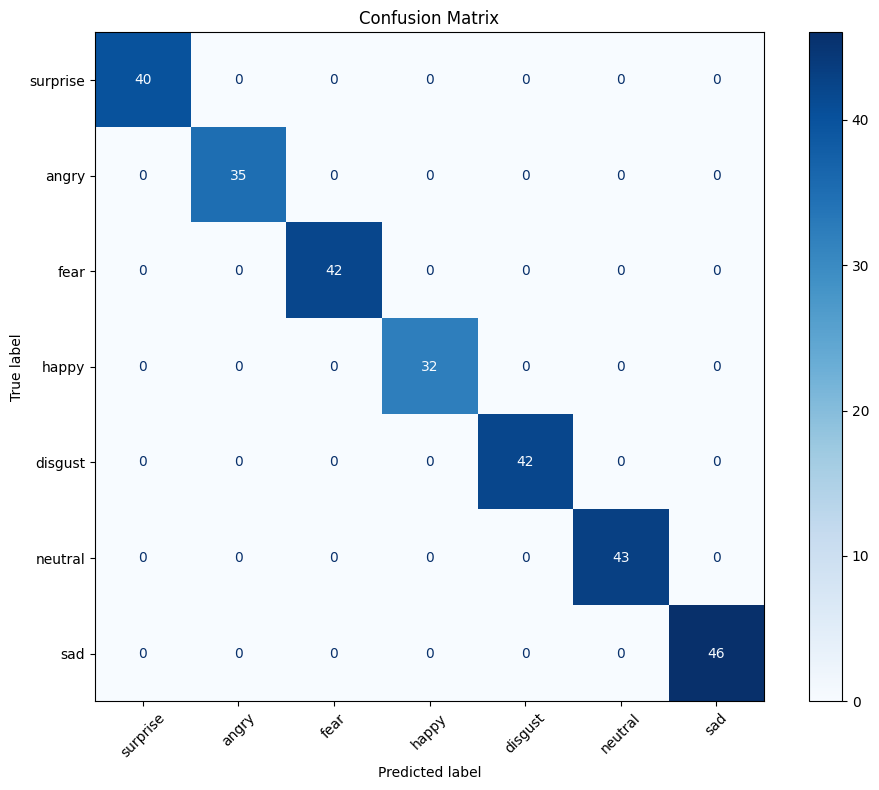

In [41]:
label_names = [label.split("_")[-1] for label, _ in sorted(label2id.items(), key=lambda x: x[1])]
eval_result = trainer.predict(test_dataset)
plot_confusion_matrix(eval_result, label_names)

TEST PREDICTION

In [43]:
import random
import torch

idx = random.randrange(0, len(test_dataset))

print("Original Label : ", inverse_label_map[int(test_dataset[idx]['label'])])

input_values = test_dataset[idx]['input_values'].unsqueeze(0).to(model.device).type(next(model.parameters()).dtype)

with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()

print("Predicted Label : ", inverse_label_map[predicted_class])


Original Label :  oaf_pleasant_surprise
Predicted Label :  oaf_pleasant_surprise


In [44]:
sad_label_id = None
for k, v in inverse_label_map.items():
    if v.lower() == "oaf_sad":
        sad_label_id = k
        break

if sad_label_id is None:
    raise ValueError("Label 'oaf_sad' not found in inverse_label_map.")

sad_indices = [i for i in range(len(test_dataset)) if test_dataset[i]['label'] == sad_label_id]

if not sad_indices:
    raise ValueError("No sample with label 'oaf_sad' found in the test dataset.")

idx = random.choice(sad_indices)

print("Original Label : ", inverse_label_map[int(test_dataset[idx]['label'])])

input_values = test_dataset[idx]['input_values'].unsqueeze(0).to(model.device).type(next(model.parameters()).dtype)

with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()
print("Predicted Label : ", inverse_label_map[predicted_class])

Original Label :  oaf_sad
Predicted Label :  oaf_sad


In [45]:
# Saving a file to the results directory

df.to_csv('/kaggle/working/results/results.csv', index=False)

In [47]:
torch.save(model.state_dict(), "emotion_model.pth")